
<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 4*

# 📝 Assignment


# Breast Cancer Clustering



## 1. 아래의 주소를 참조하여, 데이터를 `df`에 준비하세요.

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

- Feature마다 scale이 다르기 때문에 `StandardScaler`를 적용해야합니다.
- 이후,  "diagnosis"에 있는 label 데이터를 따로 `label`이라는 변수로 생성하세요.
- "diagnosis"를 제거한 나머지 데이터를 사용하여 k-means clustering을 하며, 
- `n_clusters = 2`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용합니다.

In [1]:
# API Token 다운받기
# 다운받은 API Token 업로드 하기
!pip install kaggle
from google.colab import files
files.upload()
# json 파일 옮겨주기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 데이터셋 다운로드 받기 - 링크는 그 대회 'Data'에 있음
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data
# 다운로드 된 것들 다 보기 
!ls

Saving kaggle.json to kaggle (2).json
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)
 breast-cancer-wisconsin-data.zip  'kaggle (1).json'   kaggle.json
 data.csv			   'kaggle (2).json'   sample_data


In [ ]:
# 필요하면 압축 풀기 
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import numpy as np

# 데이터 가져오기
import pandas as pd
from sklearn import datasets

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data.csv")
df['concavity_mean'].head()

0    0.3001
1    0.0869
2    0.1974
3    0.2414
4    0.1980
Name: concavity_mean, dtype: float64

In [4]:
# Drop unnecessary columns
cols_drop = ['id', 'Unnamed: 32']
df = df.drop(cols_drop, axis=1)
# Encode diagnosis label
df['diagnonis'] = df['diagnosis'].map({'M':1,'B':0})
# Featureset creation
X = df.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if __name__ == '__main__':


Text(0.5, 1.0, 'KMeans clustering plot')

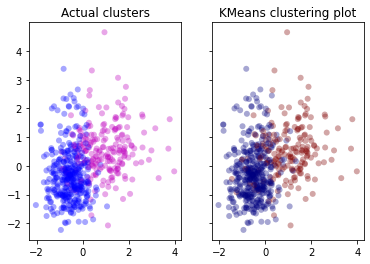

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=42)
km_pred = km.fit_predict(X)
#labels = km.labels_

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("KMeans clustering plot")

## 2. 원래 데이터의 label과, clustering 이후의 라벨을 비교하여 accuracy를 측정하고 결과를 `Acc`에 저장하세요. 

- Acc = 전체 데이터 중 라벨이 일치하는 데이터 수 입니다.

ex)

|원래 라벨|cluster 이후 label|
|:-:|:-:|
|A|A|
|A|B|
|A|A|
|B|B|
|B|B|
|B|A|

accuracy = $(2 + 2) \over 6$

이때 아래의 코드를 참고하여 `0`과 `1`로 있는데이터를 `M`과 `B`로 바꿔서 작업하면 좋습니다. 

```python
label2 = label2.replace(0,'M')
label2 = label2.replace(1,'B')
```

In [6]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [10]:
km_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [7]:
print(km.labels_.shape)
print(km_pred.shape)

(569,)
(569,)


In [12]:
acc = sum(km.labels_ - km_pred) / km.labels_.shape[0]
acc

0.0

# 🔥 도전 과제

아래 링크를 참조하여 hierarchical clustering을 breast cancer dataset에 적용하고, 그 결과를 시각화하세요.

<https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering>


Text(0.5, 1.0, 'Hierarchical  Agglomeratve clustering plot')

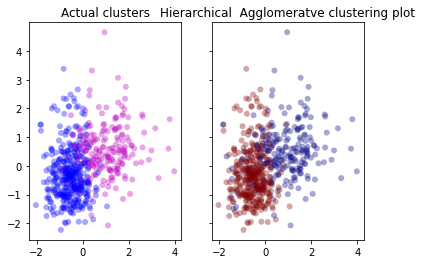

In [15]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage="ward")
ac_pred = ac.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=df["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=ac_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Hierarchical  Agglomeratve clustering plot")